<center>
    <img src="https://1000logos.net/wp-content/uploads/2017/05/Netflix-symbol.jpg" alt="image not available" style="max-width: 100%; height: auto;">
</center>

# **Business Problem**
<p> As Netflix continues to experience growth in a competitive streaming market, it faces challenges related to subscriber retention and content differentiation. With the rise of numerous alternatives offering diverse content, Netflix must address the potential for increased churn rates. The key business problem is to develop effective strategies that enhance user engagement through personalized content recommendations.<p/>

# **Netflix Dataset**
The dataset consists of a list of all the TV shows/movies available on Netflix
- Show_id: Unique ID for every Movie / Tv Show
- Type: Identifier - A Movie or TV Show
- Title: Title of the Movie / Tv Show
- Director: Director of the Movie
- Cast: Actors involved in the movie/show
- Country: Country where the movie/show was produced
- Date_added: Date it was added on Netflix
- Release_year: Actual Release year of the movie/show
- Rating: TV Rating of the movie/show
- Duration: Total Duration - in minutes or number of seasons
- Listed_in: Genre
- Description: The summary description


# **Libraries Utilized for Data Exploration and Analysis**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import plotly.graph_objects as go
from plotly.offline import iplot
import plotly.graph_objects as go
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')

# **Loading the Dataset for Analysis**

In [2]:
df = pd.read_csv('https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/000/940/original/netflix.csv')


# **Previewing the First Five Entries of the Dataset**

In [3]:
df.head(5)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


# **Analysing basic metrics**

In [4]:
print(f"Total Number of rows: {df.shape[0]}")
print(f"Total Number of columns: {df.shape[1]}")

Total Number of rows: 8807
Total Number of columns: 12


# Summary of the DataFrame Structure

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


# Statistical Summary Before Data Cleaning

In [6]:
df.describe()

,release_year
count,8807.000000
mean,2014.180198
std,8.819312
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2019.000000
max,2021.000000


The dataset contains only one numerical column, release_year, which indicates the timeframe of content availability. It ranges from 1925 to 2021. All other columns consist of categorical data.

# **Data Cleaning**

## Examination of Missing Values by Column

In [7]:
df.isna().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

The dataset reveals missing values in several key columns:

- Director: 2,634 missing entries, indicating a significant gap that could impact analyses of directorial influence.
- Cast: 825 missing entries, which may affect insights on star power and viewer preferences.
- Country: 831 missing entries, potentially limiting regional market analysis.
- Date Added: 10 missing entries, which could affect release timing evaluations.
- Rating: 4 missing entries, important for understanding content quality.
- Duration: 3 missing entries, relevant for viewer engagement analysis.

Addressing these missing values is crucial for ensuring comprehensive insights and informed decision-making.

In [8]:
print(f"Total Number of Missing Values: {df.isna().sum().sum()}")

Total Number of Missing Values: 4307


## Managing Missing Values

In [9]:
df['director'].fillna('Not Specified', inplace=True)

We are labeling missing Director names in the dataset as "Not Specified".

In [10]:
df['cast'].fillna('Not Available', inplace=True)

We are labeling missing Cast in the dataset as "Not Available".

In [11]:
df['country'].fillna('Unknown',inplace=True)

We are labeling missing Country in the dataset as "Unknown".

In [12]:
df['rating'].fillna('NR',inplace=True)

We are labeling missing Rating in the dataset as "NR" which stands for "Not Rated.".

In [13]:
df.dropna(subset=['date_added'], inplace=True)

We are removing rows with missing values in the date_added column to ensure accurate analysis of content release timelines.

In [14]:
ind = df[df['duration'].isna()].index

In [15]:
df.loc[ind]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
5541,s5542,Movie,Louis C.K. 2017,Louis C.K.,Louis C.K.,United States,"April 4, 2017",2017,74 min,NaN,Movies,"Louis C.K. muses on religion, eternal love, gi..."
5794,s5795,Movie,Louis C.K.: Hilarious,Louis C.K.,Louis C.K.,United States,"September 16, 2016",2010,84 min,NaN,Movies,Emmy-winning comedy writer Louis C.K. brings h...
5813,s5814,Movie,Louis C.K.: Live at the Comedy Store,Louis C.K.,Louis C.K.,United States,"August 15, 2016",2015,66 min,NaN,Movies,The comic puts his trademark hilarious/thought...


In this case, the duration information has been incorrectly placed under the rating column. We need to correct this by shifting the values back to their appropriate column (duration) and address any missing values in the rating column to maintain data accuracy and integrity.

In [16]:
df.loc[ind,'duration']=df.loc[ind,'rating']
df.loc[ind,'rating']='NR'

## Identifying Redundant Records in the Dataset

In [17]:
print(f"Total Numnber of duplicates in the data set: {df[df.duplicated(subset=['title','director','release_year'], keep=False)].size}")

Total Numnber of duplicates in the data set: 0


## Standardizing Date Format

In [18]:
df['date_added'] = pd.to_datetime(df['date_added'], format='mixed', errors='coerce').dt.strftime('%d-%m-%Y')


## Creating New Columns for 'Month Added' and 'Year Added' for Detailed Analysis


In [19]:
df['date_added_year'] = pd.to_datetime(df['date_added'], format='mixed').dt.year
df['date_added_month'] =  pd.to_datetime(df['date_added'], format='mixed').dt.strftime('%B')

# Statistical Summary After Data Cleaning

In [20]:
df.describe()

,release_year,date_added_year
count,8797.000000,8797.000000
mean,2014.183472,2018.871888
std,8.822191,1.574243
min,1925.000000,2008.000000
25%,2013.000000,2018.000000
50%,2017.000000,2019.000000
75%,2019.000000,2020.000000
max,2021.000000,2021.000000


In [21]:
df.describe(include='object')

,show_id,type,title,director,cast,country,date_added,rating,duration,listed_in,description,date_added_month
count,8797,8797,8797,8797,8797,8797,8797,8797,8797,8797,8797,8797
unique,8797,2,8797,4529,7683,749,1714,14,220,513,8765,12
top,s1,Movie,Dick Johnson Is Dead,Not Specified,Not Available,United States,01-01-2020,TV-MA,1 Season,"Dramas, International Movies","Paranormal activity at a lush, abandoned prope...",January
freq,1,6131,1,2624,825,2812,110,3205,1793,362,4,2511


# **Exploring Data and Conducting Non-Graphical Analysis**

## Unique Values, Count of Unique Values and Frequency of Unique Values in the Dataset.

In [22]:
print(f"Total Number of Unique Titles in the Dataset: {df['title'].nunique()}")
print("-"*30)
print(f"Unique Values in the Dataset:\n {df['title'].unique()}")

Total Number of Unique Titles in the Dataset: 8797
------------------------------
Unique Values in the Dataset:
 ['Dick Johnson Is Dead' 'Blood & Water' 'Ganglands' ... 'Zombieland'
 'Zoom' 'Zubaan']


The dataset contains a total of 8,797 unique titles.

In [23]:
print(f"Total Number of Unique Director in the Dataset: {df['director'].nunique()}")
print("-"*30)
print(f"Unique Values in the Dataset:\n {df['director'].unique()}")
print("-"*30)
print(f"Available frequency Values in the Dataset:\n {df['director'].value_counts().head(5)}")

Total Number of Unique Director in the Dataset: 4529
------------------------------
Unique Values in the Dataset:
 ['Kirsten Johnson' 'Not Specified' 'Julien Leclercq' ... 'Majid Al Ansari'
 'Peter Hewitt' 'Mozez Singh']
------------------------------
Available frequency Values in the Dataset:
 director
Not Specified             2624
Rajiv Chilaka               19
Raúl Campos, Jan Suter      18
Suhas Kadav                 16
Marcus Raboy                16
Name: count, dtype: int64


The dataset contains a total of 4529 unique Director.

In [24]:
print(f"Total Number of Unique Type in the Dataset: {df['type'].nunique()}")
print("-"*30)
print(f"Unique Values in the Dataset:\n {df['type'].unique()}")
print("-"*30)
print(f"Available frequency in the Dataset:\n {df['type'].value_counts().head(5)}")

Total Number of Unique Type in the Dataset: 2
------------------------------
Unique Values in the Dataset:
 ['Movie' 'TV Show']
------------------------------
Available frequency in the Dataset:
 type
Movie      6131
TV Show    2666
Name: count, dtype: int64


The dataset includes a total of 2 unique types, comprising 6,131 movies and 2,666 TV shows.

In [25]:
movies  = df.loc[df['type'] == 'Movie']
tv_shows = df.loc[df['type'] == 'TV Show']

In [26]:
print(f"Available frequency in the Dataset:\n {movies['duration'].value_counts().head(5)}")

Available frequency in the Dataset:
 duration
90 min    152
94 min    146
97 min    146
93 min    146
91 min    144
Name: count, dtype: int64


In [27]:
print(f"Available frequency in the Dataset:\n {tv_shows['duration'].value_counts().head(5)}")

Available frequency in the Dataset:
 duration
1 Season     1793
2 Seasons     421
3 Seasons     198
4 Seasons      94
5 Seasons      64
Name: count, dtype: int64


Available Frequency of Duration in Minutes for Movies and in Seasons for TV Shows

In [28]:
movies['duration'] = movies['duration'].str.split(' ').str[0].astype(int)
tv_shows['duration'] = tv_shows['duration'].str.split(' ').str[0].astype(int)


## Oldest and Most Recent Movies and TV Shows Released on OTT Platforms

In [29]:
print(f"Oldest Movie Released: {movies['release_year'].min()}")
print(f"Oldest TV Show Released: {tv_shows['release_year'].min()}")

Oldest Movie Released: 1942
Oldest TV Show Released: 1925


The oldest movie was released in 1942, while the oldest TV show premiered in 1925.

In [30]:
print(f"Most Recent Movie Released: {movies['release_year'].max()}")
print(f"Most Recent TV Show Released: {tv_shows['release_year'].max()}")

Most Recent Movie Released: 2021
Most Recent TV Show Released: 2021


The latest movie was released in 1942, while the oldest TV show premiered in 1925.

In [31]:
df.groupby(['type' , 'rating'])['show_id'].count().reset_index(name='count')

,type,rating,count
0,Movie,G,41
1,Movie,NC-17,3
2,Movie,NR,80
3,Movie,PG,287
4,Movie,PG-13,490
5,Movie,R,797
6,Movie,TV-14,1427
7,Movie,TV-G,126
8,Movie,TV-MA,2062
9,Movie,TV-PG,540


Total Count of Rating Categories Available for Movies and TV Shows.

In [32]:
df['country'] = df['country'].str.replace('^,|,$', '', regex=True)
unnested_country=unnested_genre=unnested_dir=unnested_cast=df
unnested_country['country']=unnested_country['country'].str.split(",")
unnested_country=unnested_country.explode(['country'])
unnested_country['country']=unnested_country.country.str.strip()


Unpacking Country Data

In [33]:
unnested_genre['listed_in']=unnested_genre['listed_in'].str.split(",")
unnested_genre=unnested_genre.explode(['listed_in'])

Unpacking Genre Data

In [34]:
unnested_dir['director']=unnested_dir['director'].str.split(",")
unnested_dir=unnested_dir.explode(['director'])

Unpacking director Data

In [35]:
unnested_cast['cast']=unnested_cast['cast'].str.split(",")
unnested_cast=unnested_cast.explode(['cast'])

In [36]:
print(f"Total Number of Unique Countries in the Dataset: {unnested_country['country'].nunique()}")
print("-"*30)
print(f"Unique Values in the Dataset:\n {unnested_country['country'].value_counts().head(10)}")

Total Number of Unique Countries in the Dataset: 123
------------------------------
Unique Values in the Dataset:
 country
United States     3684
India             1046
Unknown            830
United Kingdom     805
Canada             445
France             393
Japan              317
Spain              232
South Korea        231
Germany            226
Name: count, dtype: int64


Total Number of Unique Countries in the Dataset, Along with the Count of Titles for Each Country.

In [37]:
print(f"Total Number of Unique Genres in the Dataset: {unnested_genre['listed_in'].nunique()}")
print("-"*30)
print(f"Unique Values in the Dataset:\n {unnested_genre['listed_in'].value_counts().head(10)}")

Total Number of Unique Genres in the Dataset: 73
------------------------------
Unique Values in the Dataset:
 listed_in
 International Movies     2624
Dramas                    1600
Comedies                  1210
Action & Adventure         859
Documentaries              829
 Dramas                    827
International TV Shows     773
 Independent Movies        736
 TV Dramas                 695
 Romantic Movies           613
Name: count, dtype: int64


Total Number of Genre in the Dataset, Along with the Count of Titles for Each Genre.

In [38]:
print(f"Total Number of Unique Directors in the Dataset: {unnested_dir['director'].nunique()}")
print("-"*30)
print(f"Unique Values in the Dataset:\n {unnested_dir['director'].value_counts().head(10)}")

Total Number of Unique Directors in the Dataset: 5121
------------------------------
Unique Values in the Dataset:
 director
Not Specified          2624
Rajiv Chilaka            22
 Jan Suter               18
Raúl Campos              18
Marcus Raboy             16
Suhas Kadav              16
Jay Karas                15
Cathy Garcia-Molina      13
Martin Scorsese          12
Jay Chapman              12
Name: count, dtype: int64


Total Number of director in the Dataset, Along with the Count of Titles for Each director.

In [39]:
print(f"Total Number of Unique Cast in the Dataset: {unnested_cast['cast'].nunique()}")
print("-"*30)
print(f"Unique Values in the Dataset:\n {unnested_cast['cast'].value_counts().head(10)}")

Total Number of Unique Cast in the Dataset: 39261
------------------------------
Unique Values in the Dataset:
 cast
Not Available        825
 Anupam Kher          39
 Rupa Bhimani         31
 Takahiro Sakurai     30
 Julie Tejwani        28
 Om Puri              27
Shah Rukh Khan        26
 Rajesh Kava          26
 Andrea Libman        25
 Boman Irani          25
Name: count, dtype: int64


Total Number of Cast in the Dataset, Along with the Count of Titles for Each Cast.

# **Data Exploration and Conducting Graphical Analysis**

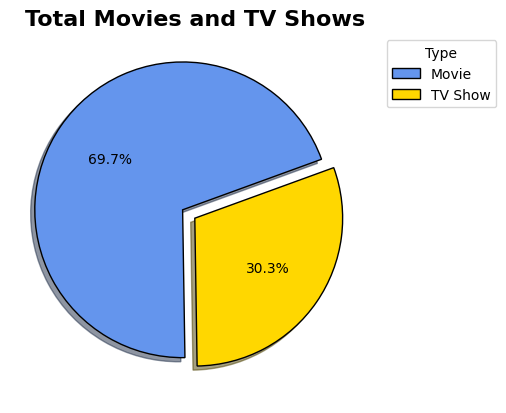

In [40]:
types = df.type.value_counts()
plt.pie(types,  autopct='%1.1f%%' , colors = ['cornflowerblue','gold'],
          startangle=20,
    explode=(0.1, 0),
    shadow=True,
    wedgeprops={'edgecolor': 'black'})
plt.legend(types.index, title="Type", loc="upper left", bbox_to_anchor=(1, 0, 0.5, 1))
plt.title('Total Movies and TV Shows',fontsize=16, fontweight='bold')
plt.show()

#### **Observations from the Pie Chart**
Content Type Distribution:

Movies Dominate: 69.7% of the total content consists of movies, indicating a significant preference or availability for movies compared to TV shows.
TV Shows Represent a Minority: 30.3% of the content is made up of TV shows, suggesting that while they are still a popular category, they are less prevalent than movies in the dataset.

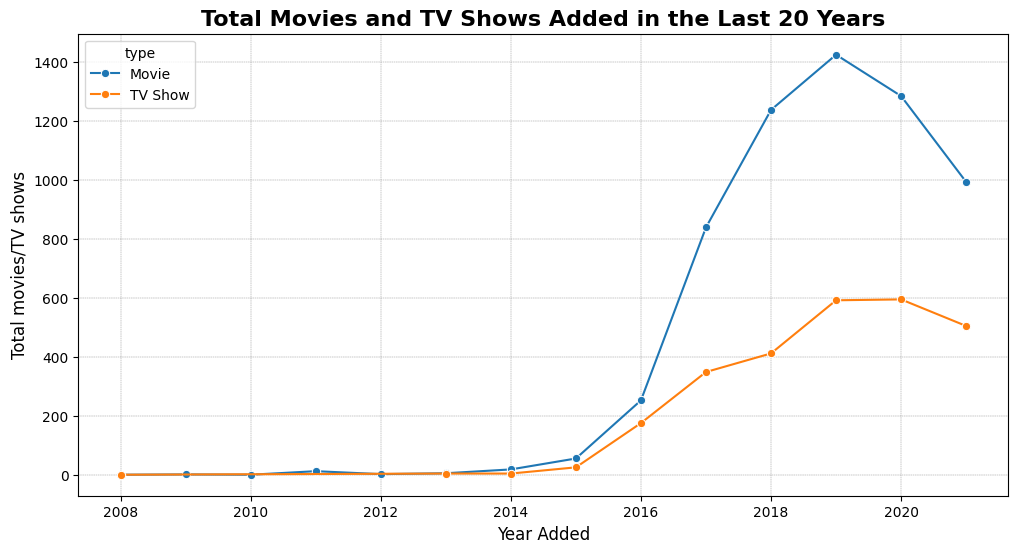

In [41]:
plt.figure(figsize = (12,6))
current_year = datetime.now().year
filtered_df = df[df['date_added_year'] >= current_year-20]
filterData=filtered_df.groupby(['date_added_year','type']).size().reset_index(name='Content_Count')
sns.lineplot(data = filterData , x = 'date_added_year' , y = 'Content_Count' , hue = 'type', marker = 'o', ci=False )
plt.xlabel('Year Added' , fontsize = 12)
plt.ylabel('Total movies/TV shows' , fontsize = 12)
plt.title('Total Movies and TV Shows Added in the Last 20 Years' ,fontsize=16, fontweight='bold')
plt.grid(True, linestyle='--', linewidth=0.3, color='gray')
plt.show()

#### **Observations**
Overall Trend:

Both movies and TV shows have seen a significant increase in the number of releases over the past 20 years.
The growth in releases has accelerated in recent years, particularly from 2016 onwards.
Specific Trends:

Movies:
The number of movies released has experienced a steady and consistent increase throughout the period.
There was a particularly sharp rise between 2016 and 2018.
TV Shows:
TV shows saw a slower initial growth compared to movies.
However, there has been a significant surge in TV show releases in recent years, with a peak around 2019.
The growth rate of TV shows has slowed down in the last couple of years.
Comparison:

Movies vs. TV Shows: Movies have consistently outnumbered TV shows in terms of releases throughout the 20-year period.
Growth Rate: While both have seen significant growth, movies have generally experienced a slightly higher growth rate compared to TV shows.
Potential Implications:

The increasing number of movies and TV shows released suggests a growing demand for content among viewers.
The rapid rise in TV show releases might indicate a shift in viewer preferences or changes in production costs and distribution channels.
The data could be further analyzed to explore factors driving the growth in content releases, such as technological advancements, changes in consumer behavior, or industry trends.

In [42]:
filtered_df = unnested_genre[unnested_genre['date_added_year'] >= current_year-20]
filterData=filtered_df.groupby(['listed_in','type']).size().reset_index(name='Content_Count')
filterData.sort_values(by='Content_Count', ascending=False, inplace=True)
filterData.head(3)

,listed_in,type,Content_Count
13,International Movies,Movie,2624
49,Dramas,Movie,1600
44,Comedies,Movie,1210


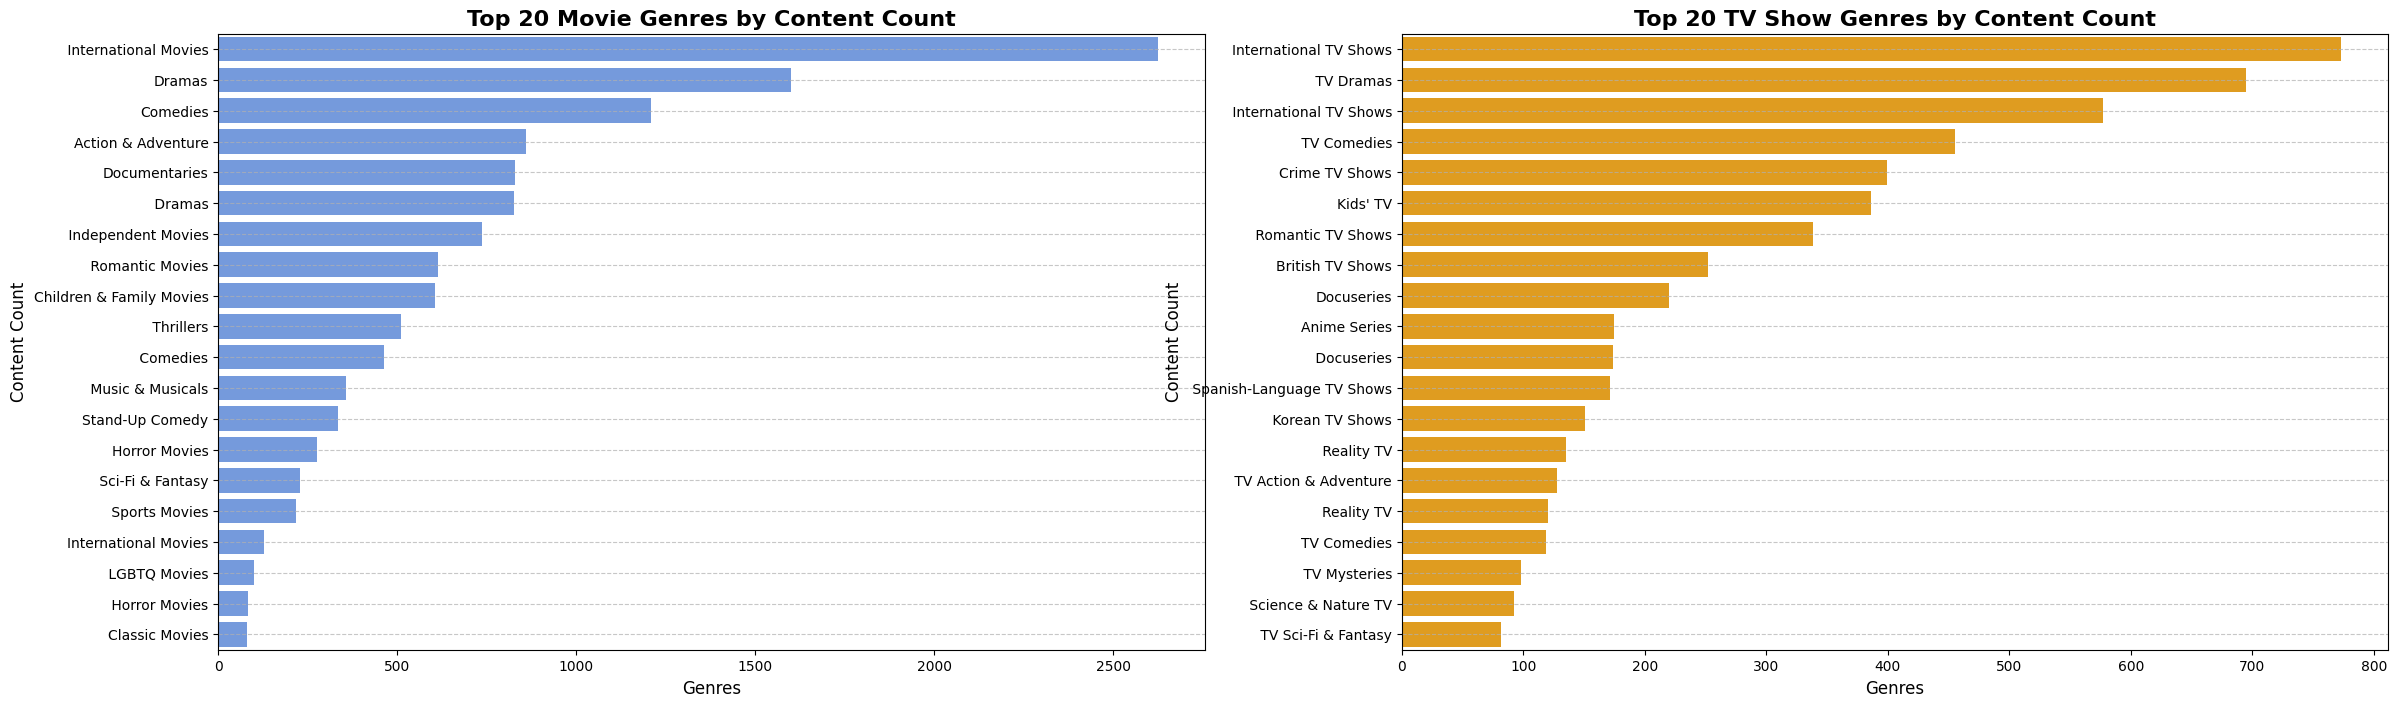

In [43]:
plt.figure(figsize=(28, 8), )
plt.subplot(1, 2, 1)
sns.barplot(data=filterData[filterData['type'] == 'Movie'][0:20],
            y="listed_in",
            x="Content_Count",
           color='cornflowerblue',
)
plt.title('Top 20 Movie Genres by Content Count', fontsize=16, fontweight='bold')
plt.xlabel('Genres', fontsize=12)
plt.ylabel('Content Count', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.subplot(1, 2, 2)
sns.barplot(data=filterData[filterData['type'] == 'TV Show'][0:20],
            y="listed_in",
            x="Content_Count",
           color='orange',
)
plt.title('Top 20 TV Show Genres by Content Count', fontsize=16, fontweight='bold')
plt.xlabel('Genres', fontsize=12)
plt.ylabel('Content Count', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


#### **Observations**
Top 20 Movie Genres:

Dominant Genres: International Movies, Dramas, and Action & Adventure are the top three genres in terms of content count, indicating a significant preference for these categories.
Diverse Genres: The chart shows a wide range of movie genres, suggesting a diverse content library.
Niche Genres: Genres like Classic Movies, LGBT Movies, and Stand-Up Comedy have lower content counts, suggesting they might be niche categories with fewer offerings.
Top 20 TV Show Genres:

Dominant Genres: International TV Shows, TV Dramas, and TV Comedies are the most popular TV show genres, reflecting similar preferences to movies.
Variety: TV shows also exhibit a diverse range of genres, although the distribution may differ slightly from movies.
Niche Genres: Genres like Anime Series, Korean TV Shows, and TV Sci-Fi & Fantasy have lower content counts in the TV show category.
Comparison:

Genre Overlap: There is some overlap between the top genres for movies and TV shows, particularly International Movies, Dramas, and Comedies.
Genre Differences: Other genres, such as Action & Adventure, Documentaries, and Independent Movies, are more prominent in the movie category, while genres like TV Mysteries, Reality TV, and British TV Shows are more prevalent in the TV show category.
Overall:

The charts provide insights into the popularity and diversity of movie and TV show genres. While some genres are common to both categories, there are distinct preferences for certain genres within each category. This information can be valuable for understanding content trends, making recommendations, and tailoring content offerings to specific audience preferences.

In [44]:
filtered_df = unnested_dir[(unnested_dir['date_added_year'] >= current_year-20)& (unnested_dir['director'] != 'Not Specified')]
filterData=filtered_df.groupby(['director','type']).size().reset_index(name='Content_Count')
filterData.sort_values(by='Content_Count', ascending=False, inplace=True)
filterData.head(3)

,director,type,Content_Count
4072,Rajiv Chilaka,Movie,22
265,Jan Suter,Movie,18
4119,Raúl Campos,Movie,18


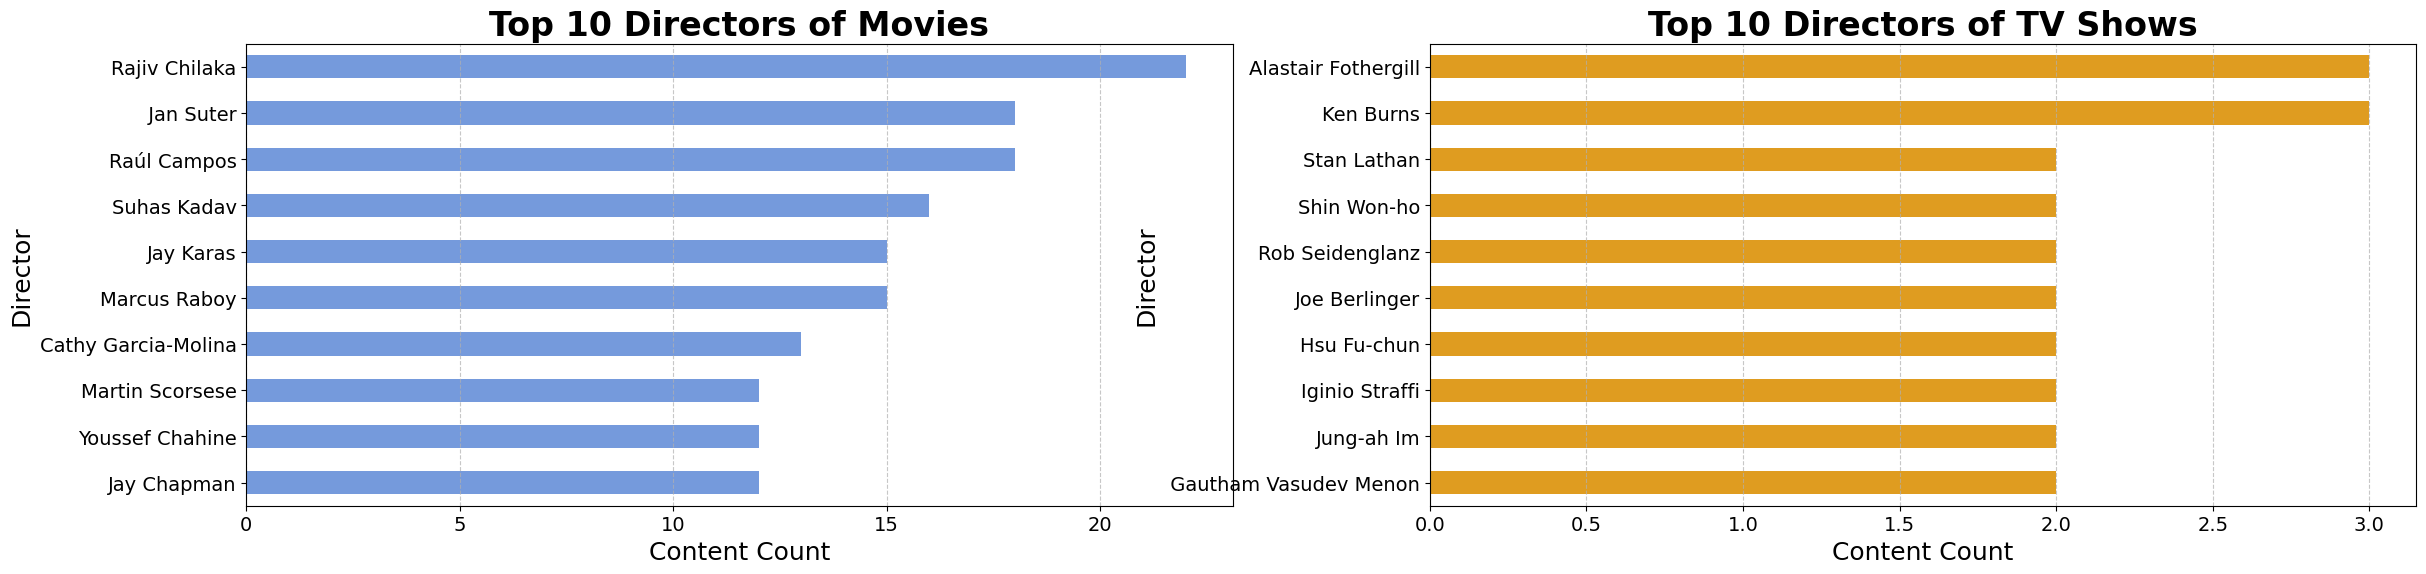

In [45]:
plt.figure(figsize=(28, 6), )
plt.subplot(1, 2, 1)
sns.barplot(data=filterData[filterData['type'] == 'Movie'][0:10],
            y="director",
            x="Content_Count",
           color='cornflowerblue',width=0.5)
plt.title('Top 10 Directors of Movies', fontsize=24, fontweight='bold')
plt.xlabel('Content Count', fontsize=18)
plt.ylabel('Director', fontsize=18)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.subplot(1, 2, 2)
sns.barplot(data=filterData[filterData['type'] == 'TV Show'][0:10],
            y="director",
            x="Content_Count",
           color='orange',width=0.5)

plt.title('Top 10 Directors of TV Shows', fontsize=24, fontweight='bold')
plt.xlabel('Content Count', fontsize=18)
plt.ylabel('Director', fontsize=18)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

#### **Observation**
Top 10 Directors of Movies:

Rajiv Chilaka and Jan Suter are the top two movie directors based on content count, indicating their significant contributions to the movie industry.
Diverse Directors: The list includes directors from various regions, including India, the United States, and Spain, suggesting a diverse range of filmmakers.
Established Directors: Renowned directors like Martin Scorsese and Youssef Chahine are also included, highlighting their continued influence.
Top 10 Directors of TV Shows:

Alastair Fothergill and Ken Burns are the leading directors in the TV show category, known for their documentary work.
Diverse Range: TV show directors also come from different backgrounds, with names like Shin Won-ho and Hsu Fu-chun representing Asian television.
Focus on Documentary and Scripted Series: Many of the top TV show directors specialize in documentary series or scripted dramas.
Comparison:

Director Overlap: There is no overlap between the top directors for movies and TV shows, suggesting that directors tend to specialize in either film or television.
Content Focus: The top movie directors may have a broader range of genres, while TV show directors often focus on specific genres like documentaries or scripted series.
Overall:

The charts provide insights into the prominent directors in the movie and TV show industries. While there is no overlap between the top directors for each category, both categories showcase a diverse range of filmmakers from different regions and backgrounds.

In [46]:
filtered_df = unnested_country[(unnested_country['date_added_year'] >= current_year-20)& (unnested_country['director'] != 'Unknown')]
filterData=filtered_df.groupby(['country','type']).size().reset_index(name='Content_Count')
filterData.sort_values(by='Content_Count', ascending=False, inplace=True)
filterData.head(3)

,country,type,Content_Count
172,United States,Movie,2752
65,India,Movie,962
173,United States,TV Show,932


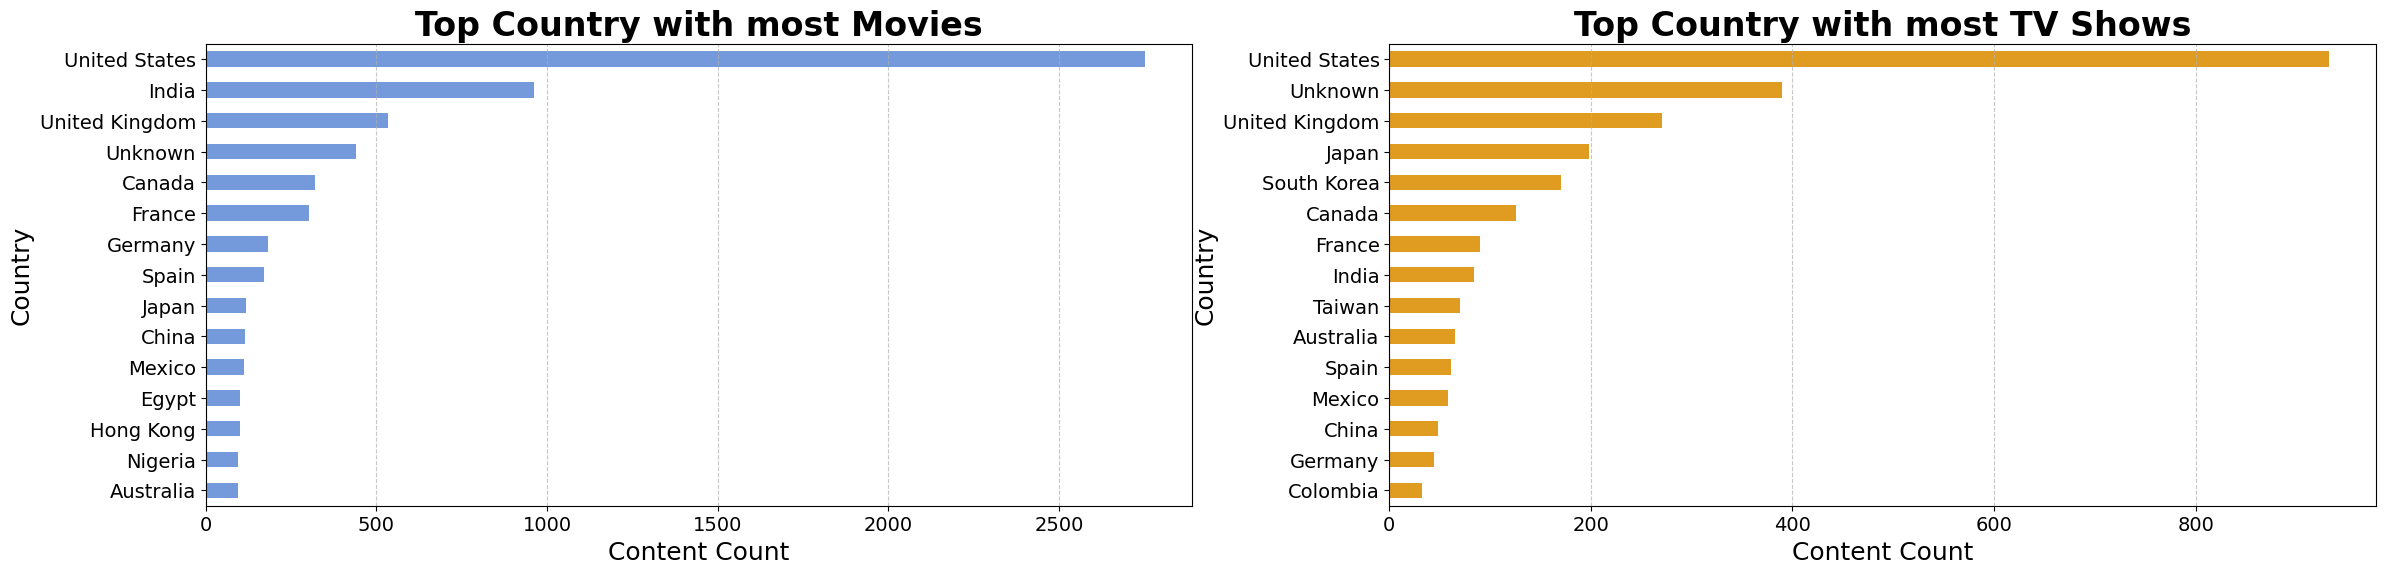

In [47]:
plt.figure(figsize=(28, 6), )
plt.subplot(1, 2, 1)
sns.barplot(data=filterData[filterData['type'] == 'Movie'][0:15],
            y="country",
            x="Content_Count",
           color='cornflowerblue',width=0.5)
plt.title('Top Country with most Movies', fontsize=24, fontweight='bold')
plt.xlabel('Content Count', fontsize=18)
plt.ylabel('Country', fontsize=18)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.subplot(1, 2, 2)
sns.barplot(data=filterData[filterData['type'] == 'TV Show'][0:15],
            y="country",
            x="Content_Count",
           color='orange',width=0.5)

plt.title('Top Country with most TV Shows', fontsize=24, fontweight='bold')
plt.xlabel('Content Count', fontsize=18)
plt.ylabel('Country', fontsize=18)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

#### **Observation**
Top Country with Most Movies:

United States: The United States dominates the list of countries with the most movies, indicating a significant portion of the content is produced domestically.
India and Unknown: India and Unknown follow closely behind, suggesting a strong presence of Indian and international content.
Western Dominance: The majority of countries in the top 10 are Western countries, reflecting the global influence of Western cinema.
Top Country with Most TV Shows:

United States: The United States also leads in the production of TV shows, although the dominance is less pronounced compared to movies.
United Kingdom and Unknown: The United Kingdom and Unknown follow closely behind, suggesting a significant contribution from these regions.
Diverse Countries: The list includes countries from various regions, including Asia, Europe, and North America, indicating a more diverse landscape for TV show production.
Comparison:

Movie Production: The United States has a stronger presence in movie production compared to TV shows.
TV Show Production: While the United States is still a major producer of TV shows, other countries like the United Kingdom and Unknown have a more significant share in this category.
Regional Diversity: The top countries for TV shows exhibit more regional diversity compared to movies, suggesting a broader range of production hubs.

In [48]:
top_10_country = unnested_country[(unnested_country['type']=='Movie') &unnested_country['country']!='Unknown' ].country.value_counts().head(10).index
country_Movie_data = unnested_country[(unnested_country['type']=='Movie')]['country'].apply(lambda x : x if x in top_10_country else 'Other Countries' )
top_10_country = unnested_country[(unnested_country['type']=='TV Show') &unnested_country['country']!='Unknown' ].country.value_counts().head(10).index
country_tv_show_data = unnested_country[(unnested_country['type']=='TV Show')]['country'].apply(lambda x : x if x in top_10_country else 'Other Countries' )


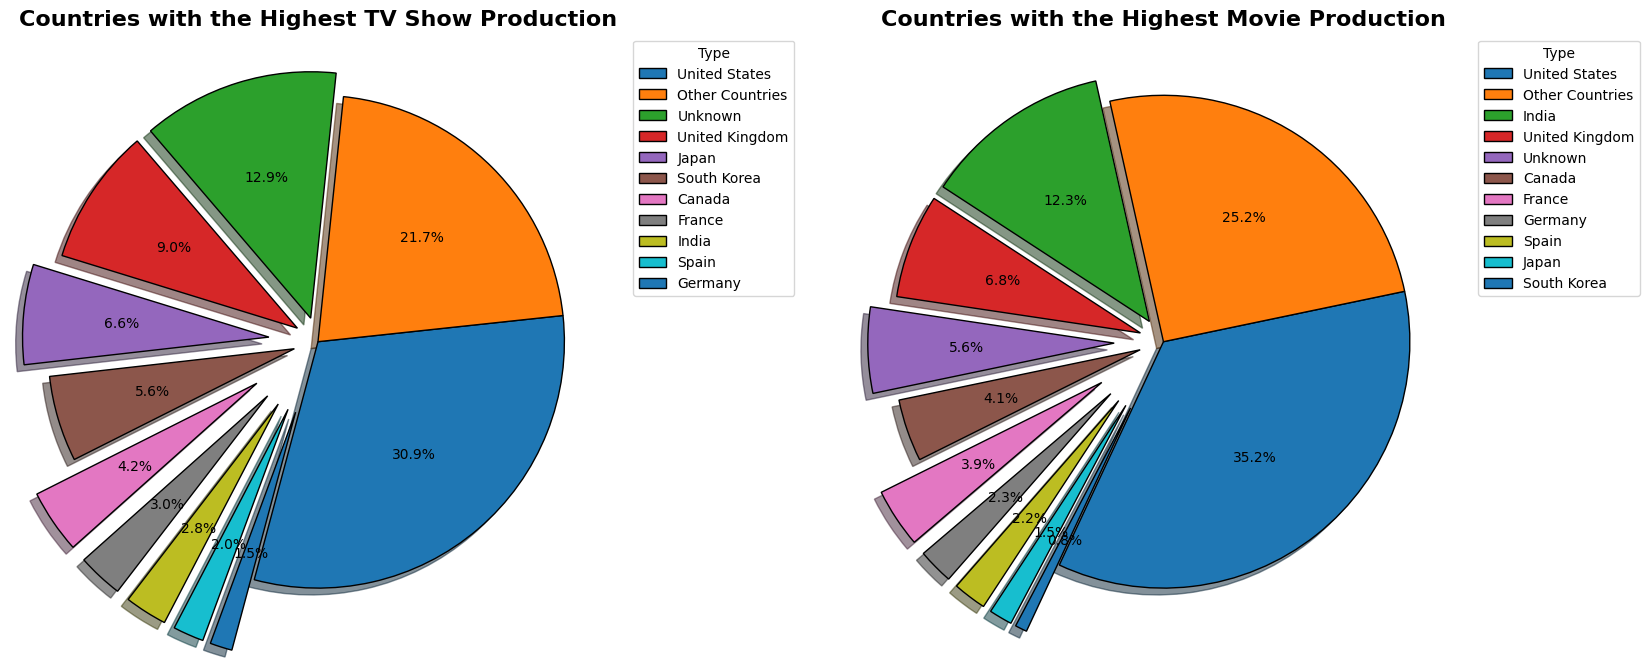

In [49]:
plt.figure(figsize=(20, 8), )
plt.subplot(1, 2, 1)
plt.pie( country_tv_show_data.value_counts() ,autopct='%1.1f%%' ,
          startangle=255,
    explode=(0, 0,0.1,0.1,0.2,0.1,0.3,0.3,0.3,0.3,0.3),
    shadow=True,
    wedgeprops={'edgecolor': 'black'})
plt.legend(country_tv_show_data.value_counts().index, title="Type", loc="upper left", bbox_to_anchor=(1, 0, 0.5, 1))
plt.title('Countries with the Highest TV Show Production',fontsize=16, fontweight='bold')
plt.subplot(1, 2, 2)
plt.pie( country_Movie_data.value_counts() ,autopct='%1.1f%%' ,
           startangle=245,
    explode=(0, 0,0.1,0.1,0.2,0.1,0.3,0.3,0.3,0.3,0.3),
    shadow=True,
    wedgeprops={'edgecolor': 'black'}

         )
plt.legend(country_Movie_data.value_counts().index, title="Type", loc="upper left", bbox_to_anchor=(1, 0, 0.5, 1))
plt.title('Countries with the Highest Movie Production',fontsize=16, fontweight='bold')
plt.show()

#### **Observations**
Countries with the Highest TV Show Production:

United States: The United States dominates TV show production, accounting for 27.8% of the total.
Other Countries: A significant portion (34.8%) of TV shows is produced in other countries, indicating a diverse landscape.
United Kingdom: The United Kingdom is the second-largest producer of TV shows, contributing 12.9% of the total.
Japan and South Korea: These countries have a notable presence in TV show production, each accounting for around 8% of the total.

Countries with the Highest Movie Production:
United States: The United States also leads in movie production, accounting for 34.6% of the total.
Other Countries: Other countries contribute 34.8% of movie production, showing a more balanced distribution compared to TV shows.
India: India is a significant player in the movie industry, contributing 11.9% of the total.
United Kingdom: The United Kingdom follows closely behind, accounting for 10.5% of movie production.

Comparison:
United States: The United States has a slightly higher share in movie production compared to TV shows.
Other Countries: Other countries have a more significant share in TV show production, indicating a more diverse landscape.
India: India has a stronger presence in movie production compared to TV shows.
United Kingdom: The United Kingdom has a relatively equal presence in both movie and TV show production.

In [50]:
groupedcountry= unnested_country.groupby(['country']).size().reset_index(name='content_count')
groupedcountry.sort_values(by='content_count', ascending=False, inplace=True)

In [51]:
fig = go.Figure(go.Choropleth(
    locationmode='country names',
    locations=groupedcountry['country'],
    z=groupedcountry['content_count'],
    colorscale='Viridis',
    autocolorscale=False,
    colorbar=dict(title='Content Count'),
    hoverinfo='all',
    hoverlabel=dict(
        bgcolor='rgba(0,0,0,0.8)',
        font=dict(color='white')
    ),
    showlegend=False
))

fig.update_layout(
    title={
        'text': "Global Distribution of Netflix Content",
        'y': 0.99,
        'x': 0.5,
        'xanchor': 'center',
        'yanchor': 'top'
    },
    margin=dict(l=0, r=0, b=50, t=50)
)

fig.show()

<center>
    <img src="newplot.png" alt="image not available" style="max-width: 100%; height: auto;">
</center>

#### **Observations**
Overall Distribution:

Concentrated Presence: Netflix content appears to be heavily concentrated in North America, Europe, and parts of Asia.
Limited Presence: Other regions, such as Africa and South America, have a more limited presence of Netflix content.
Regional Variations:

North America: The United States and Canada have a strong presence of Netflix content, with many countries displaying high levels of availability.
Europe: Western European countries, such as the United Kingdom, France, and Germany, also have a significant presence of Netflix content.
Asia: Countries in East Asia, including Japan, South Korea, and Taiwan, have a notable presence of Netflix content.
Other Regions: Africa, South America, and Oceania have limited or no coverage, suggesting that Netflix's expansion into these regions may be ongoing or less extensive.
Potential Implications:

Market Penetration: The concentration of Netflix content in certain regions indicates that Netflix has established a strong presence in these markets.
Content Localization: The varying levels of content availability across regions may suggest differences in content localization efforts or market preferences.
Expansion Opportunities: Regions with limited Netflix content could represent potential growth areas for the platform..

In [52]:
tv_show_rated_data = df[(df['type']=='TV Show')]['rating'].value_counts()
movie_rated_data = df[(df['type']=='Movie')]['rating'].value_counts()

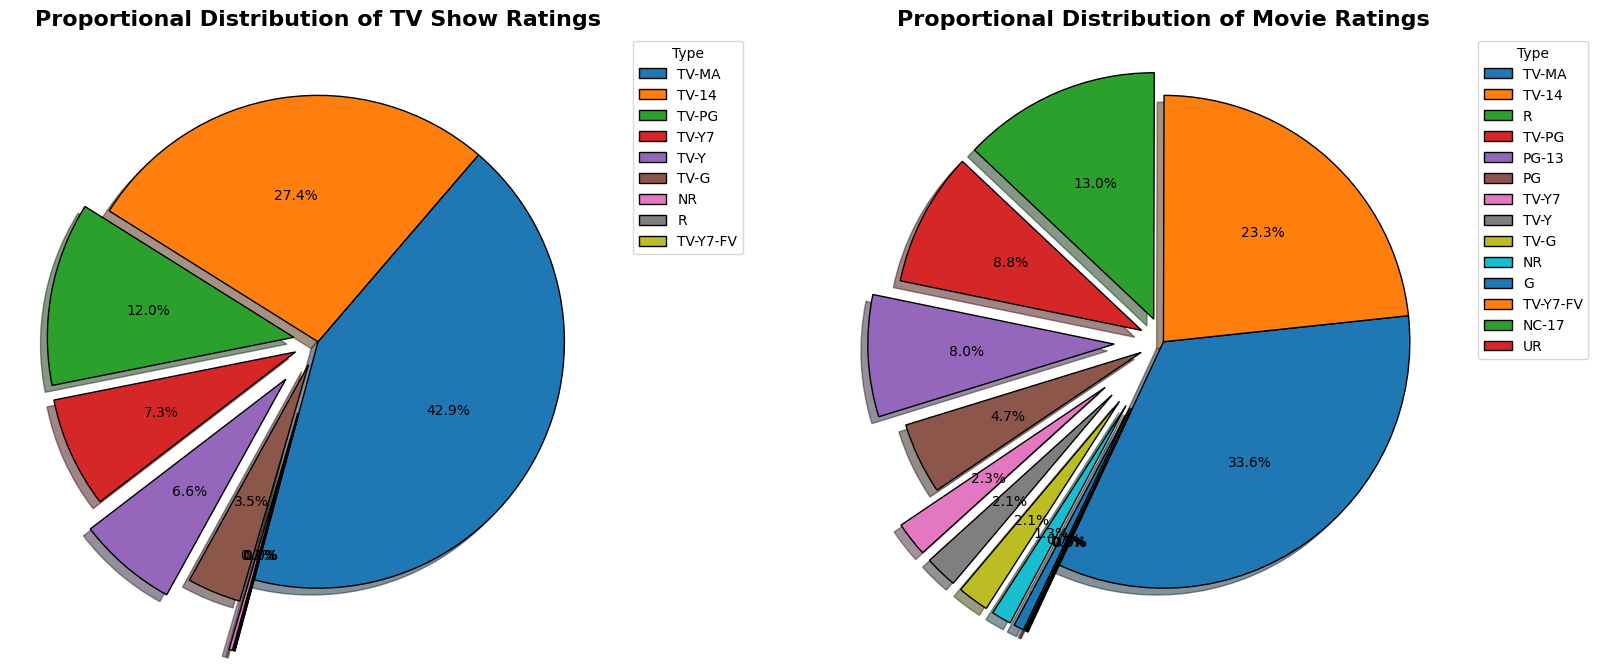

In [53]:
plt.figure(figsize=(20, 8), )
plt.subplot(1, 2, 1)
plt.pie( tv_show_rated_data ,autopct='%1.1f%%' ,
          startangle=255,
    shadow=True,
    explode=(0, 0,0.1,0.1,0.2,0.1,0.3,0.3,0.3),
    wedgeprops={'edgecolor': 'black'})
plt.legend(tv_show_rated_data.index, title="Type", loc="upper left", bbox_to_anchor=(1, 0, 0.5, 1))
plt.title('Proportional Distribution of TV Show Ratings',fontsize=16, fontweight='bold')
plt.subplot(1, 2, 2)
plt.pie( movie_rated_data ,autopct='%1.1f%%' ,
           startangle=245,
         explode=(0, 0,0.1,0.1,0.2,0.1,0.3,0.3,0.3,0.3,0.3,0.3,0.3,0.3),
    shadow=True,
    wedgeprops={'edgecolor': 'black'}

         )
plt.legend(movie_rated_data.index, title="Type", loc="upper left", bbox_to_anchor=(1, 0, 0.5, 1))
plt.title('Proportional Distribution of Movie Ratings',fontsize=16, fontweight='bold')
plt.show()

#### **Observation*
Observations from the Pie Charts
Proportional Distribution of TV Show Ratings:

TV-14: The most common rating for TV shows is TV-14, indicating that a significant portion of TV content is suitable for viewers aged 14 and above.
TV-MA: The second most common rating is TV-MA, suggesting that a considerable amount of TV content is intended for mature audiences.
Diversity of Ratings: The pie chart shows a diverse range of ratings, indicating that TV content caters to various age groups and sensitivities.
Lower Ratings: Ratings such as TV-Y7, TV-Y, and TV-G are less prevalent, suggesting that a smaller portion of TV content is targeted towards younger audiences.
Proportional Distribution of Movie Ratings:

R: The R rating dominates the movie ratings, indicating that a significant portion of movies are intended for mature audiences.
PG-13: The second most common rating is PG-13, suggesting that a considerable amount of movies are suitable for viewers aged 13 and above with parental guidance.
Variety of Ratings: Similar to TV shows, movies exhibit a diverse range of ratings, catering to different age groups.
Fewer Lower Ratings: Compared to TV shows, there are fewer movies with ratings like PG, TV-Y7, and TV-Y, suggesting a higher emphasis on mature content in the movie industry.
Comparison:

TV-14 vs. R: TV-14 is the most common rating for TV shows, while R is the most common for movies, suggesting a difference in content maturity levels between the two mediums.
Lower Ratings: TV shows have a higher proportion of lower ratings (TV-Y7, TV-Y, TV-G) compared to movies, indicating a greater focus on family-friendly content in television.
Mature Content: Movies have a higher proportion of mature ratings (R, NC-17, UR) compared to TV shows, suggesting a greater emphasis on adult themes and content in films.
Overall:

The pie charts provide insights into the rating distribution for TV shows and movies. While both mediums exhibit a diverse range of ratings, TV shows tend to have a higher proportion of lower ratings, suggesting a greater focus on family-friendly content. Movies, on the other hand, have a higher proportion of mature ratings, indicating a greater emphasis on adult themes and content.

## Understanding Distribution and Identifying Outliers

## Box plot-Visiual Analysis Before Outlier treament

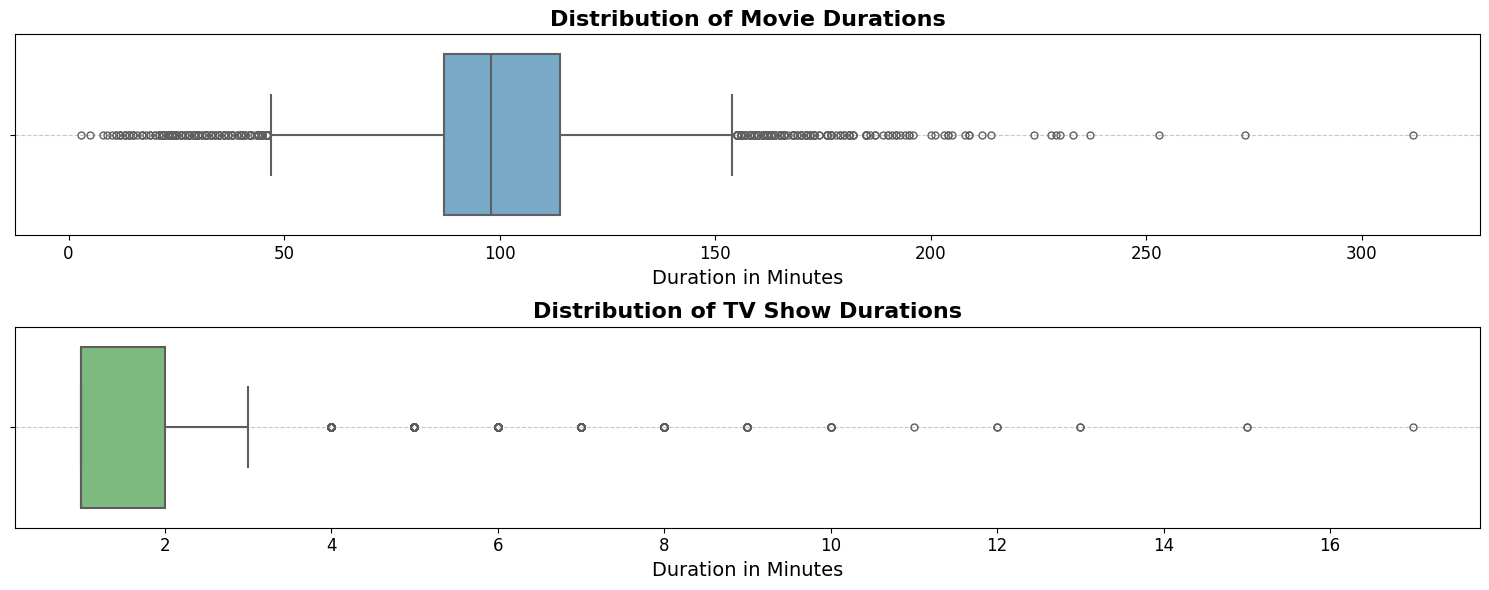

In [54]:
fig, ax = plt.subplots(2, 1, figsize=(15, 6))
sns.boxplot(data=movies, x='duration', ax=ax[0], palette='Blues', fliersize=5, linewidth=1.5)
ax[0].set_xlabel('Duration in Minutes', fontsize=14)
ax[0].set_title('Distribution of Movie Durations', fontsize=16, fontweight='bold')
ax[0].tick_params(axis='x', labelsize=12)
ax[0].tick_params(axis='y', labelsize=12)
ax[0].grid(axis='y', linestyle='--', alpha=0.7)

sns.boxplot(data=tv_shows, x='duration', ax=ax[1], palette='Greens', fliersize=5, linewidth=1.5)
ax[1].set_xlabel('Duration in Minutes', fontsize=14)
ax[1].set_title('Distribution of TV Show Durations', fontsize=16, fontweight='bold')
ax[1].tick_params(axis='x', labelsize=12)
ax[1].tick_params(axis='y', labelsize=12)
ax[1].grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


#### **Observations:**
Movie Durations:

Median Duration: The median duration for movies is around 100 minutes.
IQR: The interquartile range (IQR) is relatively large, indicating a significant spread in movie durations.
Outliers: There are several outliers, particularly on the right side of the box plot, suggesting some movies have significantly longer durations.
Distribution: The distribution is skewed to the right, with a longer tail on the right side. This means there are more movies with longer durations compared to shorter ones.
TV Show Durations:

Median Duration: The median duration for TV shows is around 4 minutes.
IQR: The IQR is relatively small, indicating a narrower range of TV show durations.
Outliers: There are fewer outliers compared to movies, suggesting a more concentrated distribution.
Distribution: The distribution appears to be roughly symmetrical, with a slight skew to the right.
Comparison:

Duration Range: Movies generally have much longer durations compared to TV shows.
Variability: Movie durations exhibit more variability than TV show durations, as evidenced by the larger IQR and the presence of more outliers.

###Identifying Maximum and Minimum Durations of Movies and TV Shows for Outlier Analysis

In [55]:
movie_duration =movies['duration'].max(), movies['duration'].min()
tv_shows_duration = tv_shows['duration'].max(), tv_shows['duration'].min()

In [56]:
print(f"Maximum Duration of Movies: {movie_duration[0]}")
print(f"Minimum Duration of Movies: {movie_duration[1]}")
print("-"*30)
print(f"Maximum Duration of TV Shows: {tv_shows_duration[0]}")
print(f"Minimum Duration of TV Shows: {tv_shows_duration[1]}")

Maximum Duration of Movies: 312
Minimum Duration of Movies: 3
------------------------------
Maximum Duration of TV Shows: 17
Minimum Duration of TV Shows: 1


###Conducting Outlier Analysis for Movies and TV Shows

#### **Movies Outlier Analysis**


In [57]:
Q1 = movies['duration'].quantile(0.25)
Q3 = movies['duration'].quantile(0.75)
IQR = Q3 - Q1
movie_lower_bound = Q1 - 1.5 * IQR
movie_upper_bound = Q3 + 1.5 * IQR
print(f"Upper Bound: {movie_upper_bound}, Lower Bound: {movie_lower_bound}")
is_outlier_upper = movie_upper_bound < movie_duration[0]
is_outlier_lower = movie_lower_bound > movie_duration[1]
print(f"Is the value exceeding the upper bound limit? {is_outlier_upper}")
print(f"Is the value falling below the lower bound limit? {is_outlier_lower}.")


Upper Bound: 154.5, Lower Bound: 46.5
Is the value exceeding the upper bound limit? True
Is the value falling below the lower bound limit? True.


### Observations for Movies Outlier
Upper Bound: The calculated upper bound for movie durations is 154.5 minutes. This means that any movie with a duration exceeding this limit is considered an outlier, indicating it falls outside the typical range of durations.

Lower Bound: The calculated lower bound for movie durations is 46.5 minutes. Any movie with a duration below this limit is also classified as an outlier, suggesting it is unusually short compared to the majority of movies.

Outlier Assessment:

The analysis indicates that there are values exceeding the upper bound limit, which confirms that certain movies have significantly longer durations than what is typical in the dataset.
Additionally, there are values falling below the lower bound limit, suggesting that some movies are notably shorter than the standard durations observed in the dataset.

#### **Tv Shows Outlier Analysis**

In [58]:
Q1 = tv_shows['duration'].quantile(0.25)
Q3 = tv_shows['duration'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
tv_show_lower_bound = Q1 - 1.5 * IQR
tv_show_upper_bound = Q3 + 1.5 * IQR
print(f"Upper Bound: {tv_show_upper_bound}, Lower Bound: {tv_show_lower_bound}")
is_outlier_upper = tv_show_upper_bound < movie_duration[0]
is_outlier_lower = tv_show_lower_bound > movie_duration[1]
print(f"Is the value exceeding the upper bound limit? {is_outlier_upper}")
print(f"Is the value falling below the lower bound limit? {is_outlier_lower}.")

Upper Bound: 3.5, Lower Bound: -0.5
Is the value exceeding the upper bound limit? True
Is the value falling below the lower bound limit? False.


### Observations for Tv Shows Outlier
Upper Bound: The calculated upper bound for the dataset is 3.5. This indicates that any values exceeding this threshold are considered outliers, reflecting observations that are significantly higher than the typical range.

Lower Bound: The calculated lower bound for the dataset is -0.5. Values below this threshold are also classified as outliers, indicating that they fall below what is generally expected.

Outlier Assessment:

The analysis confirms that there are values exceeding the upper bound limit (3.5), suggesting that certain observations are significantly higher than most other values in the dataset. This may point to exceptional cases or anomalies that require further investigation.
However, there are no values falling below the lower bound limit (-0.5). This indicates that all observations in the dataset are within the acceptable range and do not exhibit unusually low values.

#### **Cleaning data for Movie and Tv Shows Datasets **

In [59]:
clean_Movies_data = movies[(movies['duration'] >= movie_lower_bound) & (movies['duration'] <= movie_upper_bound)]
clean_Tv_shows_data = tv_shows[(tv_shows['duration'] >= tv_show_lower_bound) & (tv_shows['duration'] <= tv_show_upper_bound)]

## Box plot-Visiual Analysis After Outlier treament

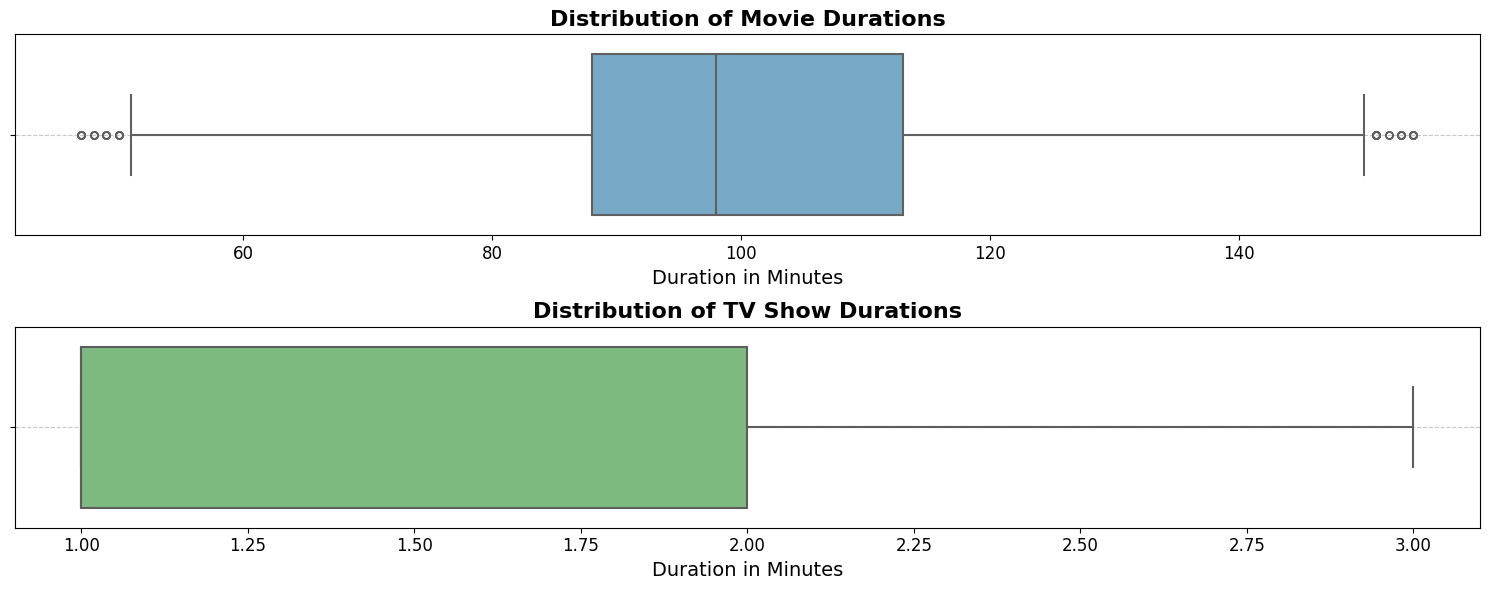

In [60]:
fig, ax = plt.subplots(2, 1, figsize=(15, 6))
sns.boxplot(data=clean_Movies_data, x='duration', ax=ax[0], palette='Blues', fliersize=5, linewidth=1.5)
ax[0].set_xlabel('Duration in Minutes', fontsize=14)
ax[0].set_title('Distribution of Movie Durations', fontsize=16, fontweight='bold')
ax[0].tick_params(axis='x', labelsize=12)
ax[0].tick_params(axis='y', labelsize=12)
ax[0].grid(axis='y', linestyle='--', alpha=0.7)

sns.boxplot(data=clean_Tv_shows_data, x='duration', ax=ax[1], palette='Greens', fliersize=5, linewidth=1.5)
ax[1].set_xlabel('Duration in Minutes', fontsize=14)
ax[1].set_title('Distribution of TV Show Durations', fontsize=16, fontweight='bold')
ax[1].tick_params(axis='x', labelsize=12)
ax[1].tick_params(axis='y', labelsize=12)
ax[1].grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

#### **Observations:**
Movie Durations:
Reduced Outliers: The number of outliers on the right side of the box plot has significantly decreased, suggesting that the outlier treatment was effective in removing extreme values.
Distribution: The distribution remains skewed to the right, but the overall spread has been reduced.
Median and IQR: The median duration and interquartile range (IQR) may have shifted slightly due to the removal of outliers.
TV Show Durations:

No Significant Changes: The box plot for TV show durations appears to be unchanged, indicating that there were likely no outliers or that the outlier treatment had minimal impact on this dataset.

## Analyzing the Variation of Durations Over Time for Movies and TV Shows

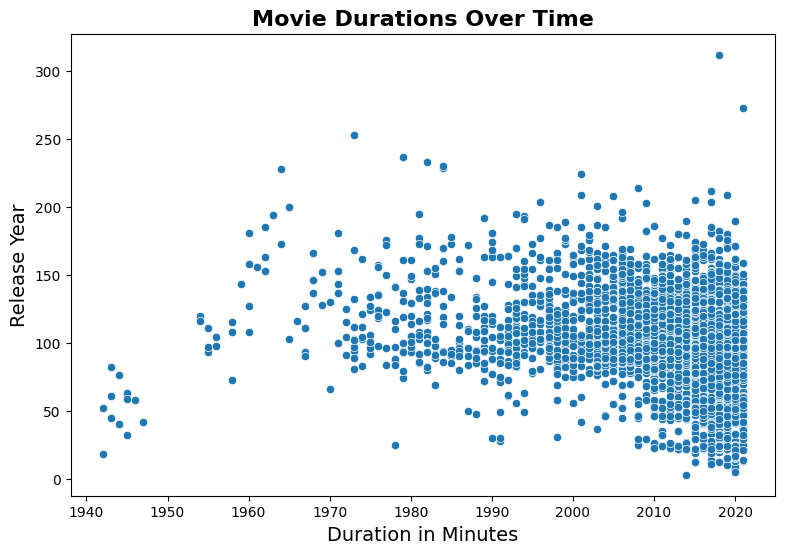

In [61]:
plt.figure(figsize = (20,6))
plt.subplot(1,2,1)
sns.scatterplot(y=movies['duration'],x= movies['release_year'],  alpha=1)
plt.title('Movie Durations Over Time', fontsize=16, fontweight='bold')
plt.xlabel('Duration in Minutes', fontsize=14)
plt.ylabel('Release Year', fontsize=14)
plt.show()


#### **Observation**
Observations from the Scatter Plot
Overall Trend:

There seems to be a slight increase in movie durations over time, particularly in the later decades. However, there is also a significant amount of variation within each year.
Specific Observations:

Early Years: Movies released in the 1940s and 1950s tended to be shorter in duration.
Mid-20th Century: Movie durations started to increase in the mid-20th century, with a noticeable cluster of movies around the 100-minute mark.
Recent Years: In recent decades, there is a wider range of movie durations, with some movies exceeding 200 minutes. However, the majority of movies still fall within the 90-150 minute range.

## **Analyzing Relationships Between Variables: A Pair Plot Approach**

<Figure size 2000x600 with 0 Axes>

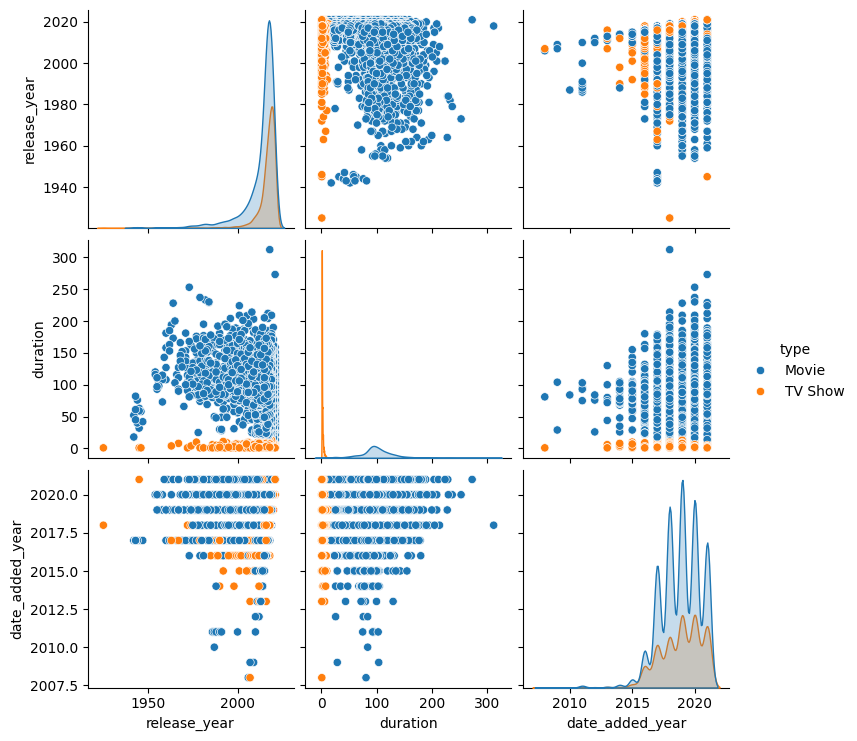

In [62]:
plt.figure(figsize = (20,6))
df['duration']=df['duration'].str.split(' ').str[0].astype(int)
sns.pairplot(data=df,hue='type')
plt.show()

#### **Observation**
Relationships Between Variables:

Duration vs. Release Year: There seems to be a slight positive correlation between duration and release year, suggesting that movies released in recent years tend to be slightly longer than those released in earlier years.
Duration vs. Date Added Year: There appears to be a weak negative correlation between duration and date added year, indicating that movies and TV shows added more recently might have slightly shorter durations.
Release Year vs. Date Added Year There's a strong positive correlation between release year and date added year, as expected, since movies and TV shows are typically added after they are released.

### Analyzing the Relationship Between Movie Release Year and Duration Using Joint Plot Approach

<Figure size 1200x600 with 0 Axes>

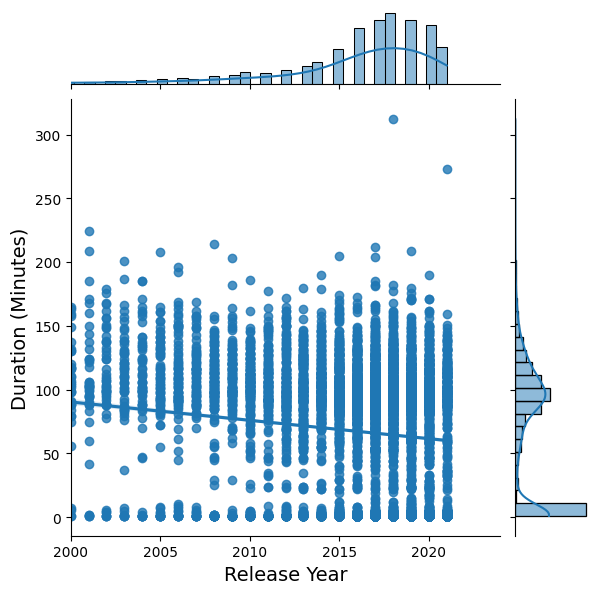

In [63]:
plt.figure(figsize=(12, 6))
sns.jointplot(x='release_year', y='duration', kind='reg', data=df, xlim=(2000, 2024))
plt.xlabel('Release Year', fontsize=14)
plt.ylabel('Duration (Minutes)', fontsize=14)
plt.show()

### **Observation**
Relationship Between Release Year and Duration:

Weak Negative Correlation: There appears to be a weak negative correlation between release year and duration. This suggests that, on average, movies released in more recent years tend to be slightly shorter than those released in earlier years. However, the correlation is not very strong, indicating that there are other factors influencing movie durations.

heat map

In [64]:
top_20_country = unnested_country.country.value_counts().head(20).index
top_20_country = unnested_country.loc[unnested_country['country'].isin(top_20_country)]
x = top_20_country.merge(df , on = 'show_id').groupby(['country_x' , 'rating_y'])['show_id'].count().reset_index()
country_rating = x.pivot(index = ['country_x'] , columns = 'rating_y' , values = 'show_id')

Text(0.5, 1.0, 'Countries V/s Rating')

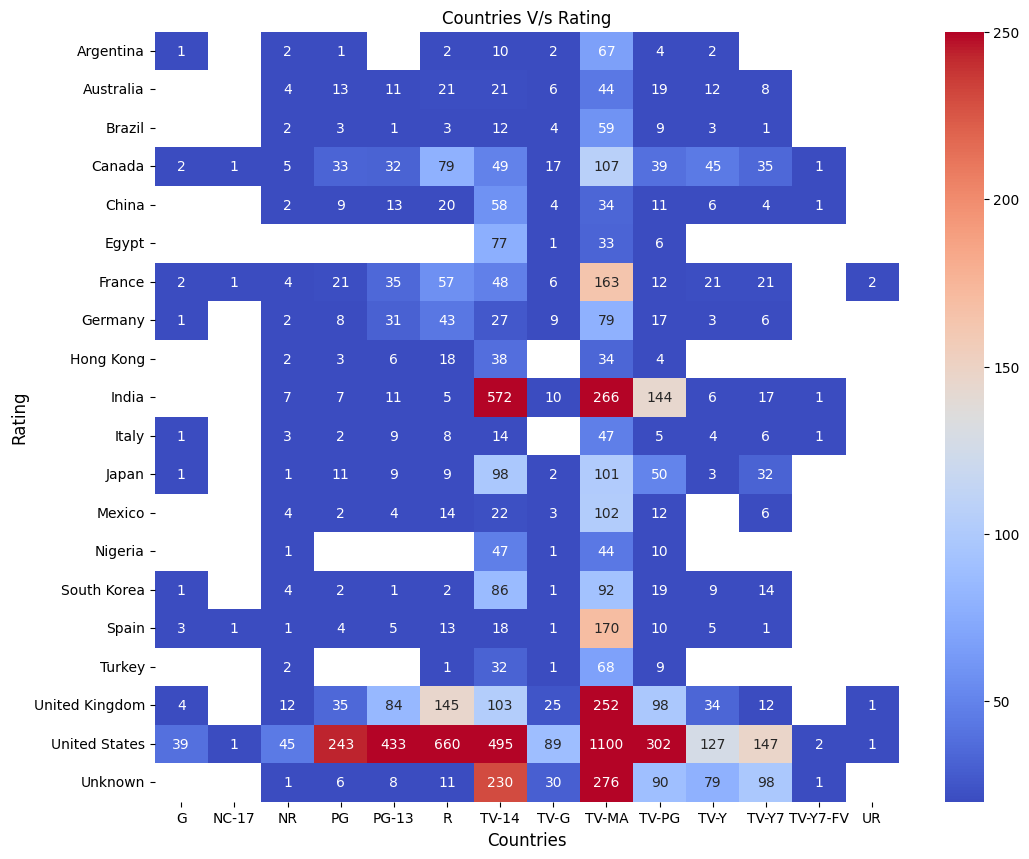

In [65]:
plt.figure(figsize = (12,10))
sns.heatmap(data = country_rating , annot = True ,cmap= "coolwarm", fmt=".0f" , vmin = 20 , vmax = 250 )
plt.xlabel('Countries' , fontsize = 12)
plt.ylabel('Rating' , fontsize = 12)
plt.title('Countries V/s Rating' , fontsize = 12)

### **Observations**
Overall Distribution:

United States: The United States has the highest number of movies and TV shows across almost all ratings, indicating its dominance in the content market.
Diverse Content: The other countries have a more diverse range of content, with varying numbers of movies and TV shows across different ratings.
Regional Trends: Some regions, such as Europe and Asia, have a higher concentration of content in certain rating categories, suggesting regional preferences or production trends.
Specific Observations:

TV-14: The TV-14 rating is the most common across most countries, suggesting that a significant portion of content is suitable for viewers aged 14 and above.
R: The R rating is prevalent in the United States, indicating a higher emphasis on mature content in American productions.
NC-17: The NC-17 rating is less common overall, suggesting that explicit content is less prevalent in the content library.
Regional Variations: Countries like India and Egypt have a higher concentration of movies and TV shows with lower ratings (G, PG, PG-13), while countries like the United States and United Kingdom have a higher proportion of mature-rated content.
Potential Implications:

Content Preferences: The distribution of ratings can provide insights into the content preferences of viewers in different regions.
Regulatory Influences: Variations in rating distributions across countries may be influenced by different regulatory frameworks and cultural sensitivities.
Content Diversity: The presence of a diverse range of ratings suggests a diverse content library catering to different audiences.

### **Release Patterns of TV Shows and Movies on Netflix**

In [66]:
movies_month_year = movies.groupby(['date_added_year' , 'date_added_month'])['show_id'].count().reset_index()
tv_shows_month_year = tv_shows.groupby(['date_added_year' , 'date_added_month'])['show_id'].count().reset_index()

Text(0.5, 0.98, 'Year and Month of Adding Movies and Tv Shows on Netflix')

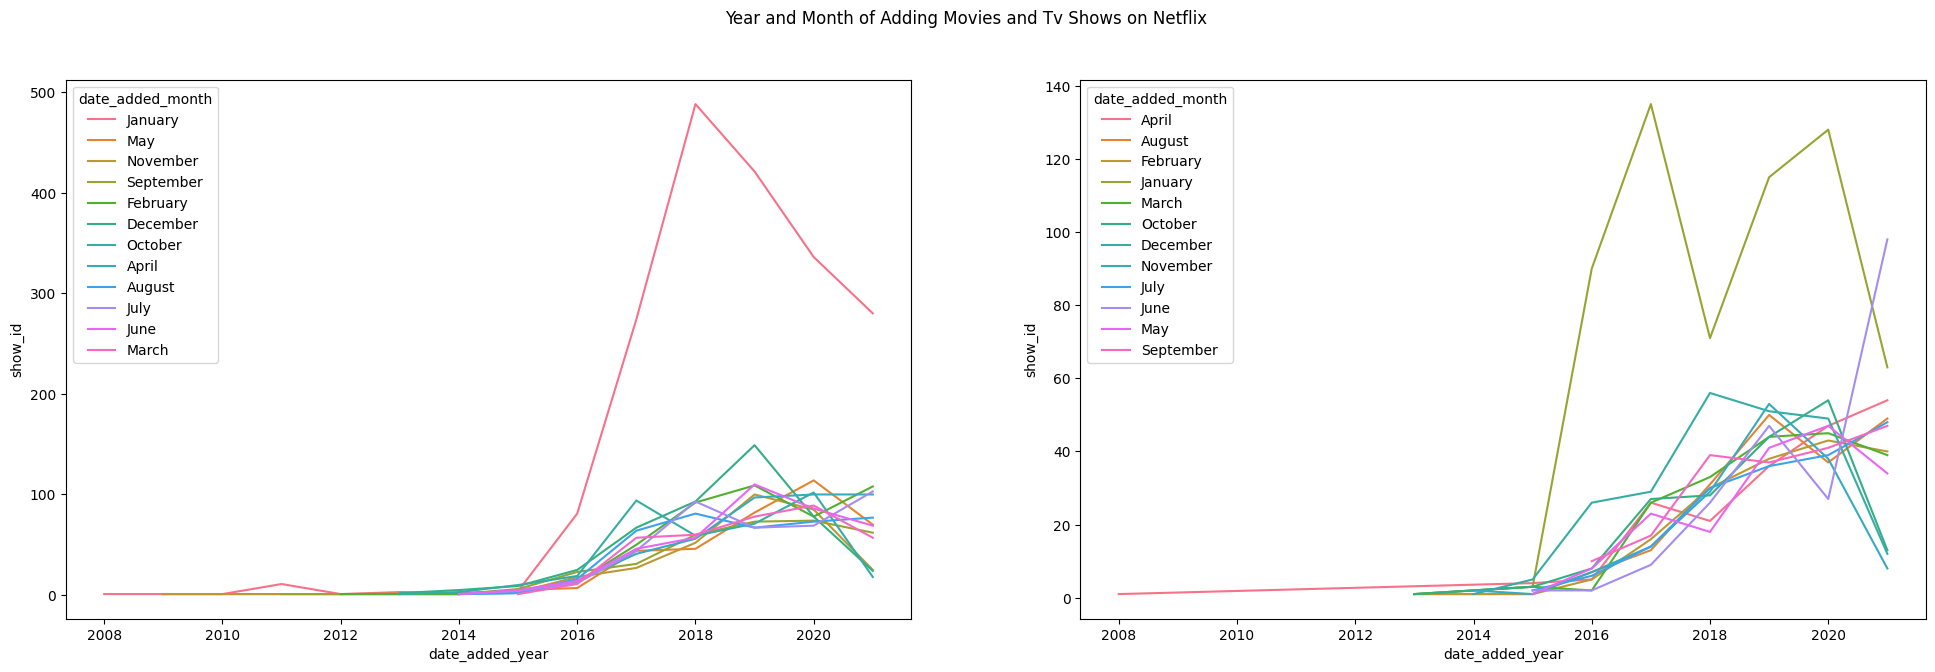

In [67]:
fig, ax = plt.subplots(1, 2, figsize=(24, 7))
sns.lineplot(data=movies_month_year, x = 'date_added_year', y = 'show_id', hue='date_added_month',ax=ax[0])
sns.lineplot(data=tv_shows_month_year, x = 'date_added_year', y = 'show_id', hue='date_added_month',ax=ax[1])
plt.suptitle('Year and Month of Adding Movies and Tv Shows on Netflix')

### **Observations**
Overall Trends:

Both subplots show an increasing trend in the number of movies and TV shows added to Netflix over the years.
The rate of growth seems to have accelerated in recent years, particularly after 2016.
Month-to-Month Variations:

Subplot 1:
There are noticeable seasonal fluctuations in the number of movies and TV shows added.
December and January tend to have higher additions, possibly due to holiday seasons and year-end releases.
Summer months (June, July, and August) generally have lower additions.
Subplot 2:
The seasonal variations in TV show additions are less pronounced compared to movies.
There is a more consistent pattern of growth throughout the year, with some minor fluctuations.

top cast

In [68]:
top_5_country = unnested_country.country[unnested_country['country']!='Unknown'].value_counts().head(5).index
top_5_actor= pd.DataFrame()
for i in top_5_country:
    top_cast = unnested_cast[(unnested_cast.country.astype(str).str.contains(i.strip())) &(unnested_cast['cast']!='Not Available')].cast.value_counts().reset_index().head(5)
    top_cast['top_country']=i
    top_5_actor = pd.concat([top_5_actor,top_cast])
top_5_actor

,cast,count,top_country
0,Adam Sandler,20,United States
1,Fred Tatasciore,19,United States
2,Molly Shannon,16,United States
3,Alfred Molina,15,United States
4,Sean Astin,15,United States
0,Anupam Kher,36,India
1,Om Puri,26,India
2,Boman Irani,25,India
3,Shah Rukh Khan,25,India
4,Paresh Rawal,25,India


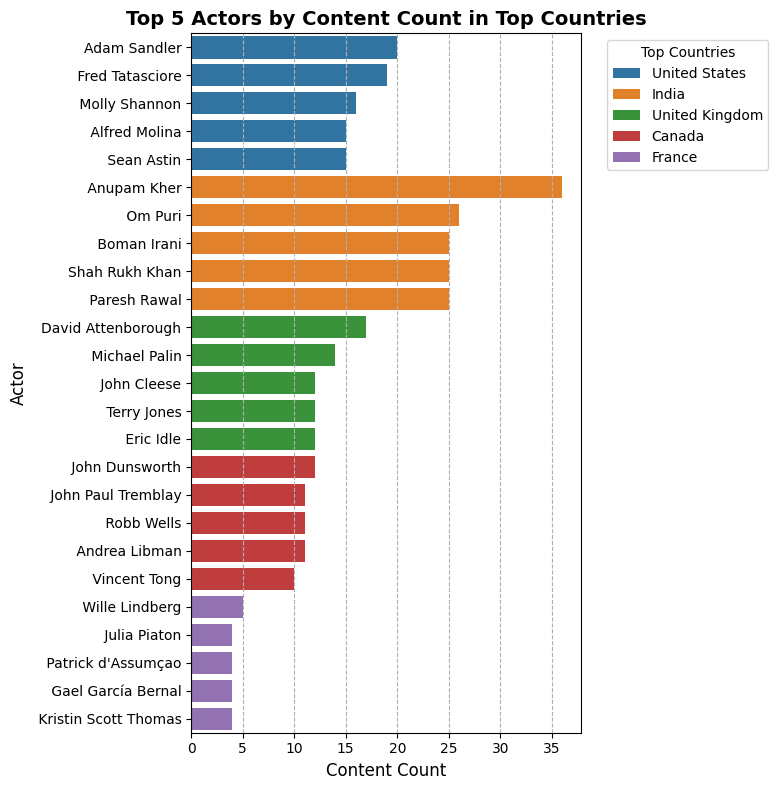

In [69]:
plt.figure(figsize=(8, 8))
sns.barplot(data=top_5_actor, y='cast', x='count', hue='top_country')
plt.title('Top 5 Actors by Content Count in Top Countries', fontsize=14, fontweight='bold')
plt.xlabel('Content Count', fontsize=12)
plt.ylabel('Actor', fontsize=12)
plt.legend(title='Top Countries', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(axis='x', linestyle='--')
plt.tight_layout()
plt.show()

#### Observations
Anupam Kher from India has the highest content count, with over 35 entries.
The top actors represent five countries: the United States, India, United Kingdom, Canada, and France.
Sean Astin from the United States and Paresh Rawal from India also have high content counts, both over 20.
Several British actors, such as David Attenborough, Michael Palin, and John Cleese, have moderate content counts (between 10-15).
Actors from India dominate the chart with multiple entries, including Om Puri, Boman Irani, and Shah Rukh Khan.
The content count for actors from France (e.g., Kristin Scott Thomas and Patrick d'Assumçao) is generally lower.
The graph highlights regional representation of actors across content, with a strong presence of Indian and UK actors.

# **Business Insights**

#### Content Distribution
- **Geographical Concentration**: Netflix's content is heavily concentrated in North America, Europe, and parts of Asia, with a limited presence in regions like Africa and South America.
- **U.S. Dominance**: The U.S. leads with the highest content offerings, particularly in mature ratings (R, NC-17).
- **Content Growth**: Content growth has accelerated significantly, especially after 2016, with more additions in high-demand months like December and January.

#### Content Localization & Genre Preferences
- **Regional Preferences**: Regional preferences are evident, with different regions favoring specific ratings and genres.
- **Dominant Genres**: Key genres include International Movies, Dramas, and Action & Adventure.

#### Content Release Patterns
- **Movies vs. TV Shows**: While both movies and TV shows have seen consistent growth, the increase in TV shows has been sharper since 2019.
- **Movie Releases**: Movies still outnumber TV shows in terms of total releases.

#### Financial and Competitive Landscape
- **Competitive Pressures**: Netflix faces increasing competition from other platforms with varied content offerings, potentially leading to subscriber churn.

---

# **Business Recommendations**

#### 1. Expand Content Localization and Presence
- **Action Item**: Increase content localization efforts in regions with limited content like Africa and South America.
- **Goal**: Investing in local productions and tailoring content to regional preferences can drive subscriber growth.

#### 2. Diversify Genre Offerings
- **Action Item**: While dominant genres like Dramas and Action perform well, Netflix should expand niche genres like Anime and LGBT content.
- **Goal**: This will help cater to diverse audience segments and attract new viewers.

#### 3. Capitalize on Seasonal Content Demand
- **Action Item**: Boost content releases in high-demand months like December and January.
- **Goal**: Leveraging seasonal peaks for exclusive releases can enhance viewership and engagement.

#### 4. Combat Churn with Personalized Recommendations
- **Action Item**: Strengthen personalized content recommendations based on user preferences and viewing history.
- **Goal**: This will help combat churn and retain subscribers by offering tailored experiences.

#### 5. Enhance Mature Content Offerings in Key Markets
- **Action Item**: Given the success of mature-rated content in the U.S., invest in producing high-quality content for this segment in key markets.
- **Goal**: This will help maintain Netflix’s appeal in regions that favor mature content.

#### 6. Optimize Global Expansion Strategy
- **Action Item**: Focus on penetrating untapped markets with localized content and partnerships with local creators.
- **Goal**: This strategy will solidify Netflix’s position as a global leader in streaming services.
